# 2020 Guía 7: Predicciones
---


El principal objetivo de esta guía es seguir programando. Para eso, en el marco de esta
materia, hemos elegido ahora una excusa con datos. Es una especie de ejemplo juguete, pero
poderoso (el chiquitín)!



En esta página están los datos podrás acceder a los datos que vas a utilizar para resolver
esta guía. La idea es que cada uno trabaje con sus propios datos y por eso les pedimos
que ingresen el número de libreta (o 5 últimos del DNI) para suministrar datos de forma
personalizada. A medida que aumentan el tamañon del conjunto de datos, incluyen nuevos
casos; se agregan filas.

# 1. Calentando motores

1. Descargar de esta página un conjunto de n=500 observaciones, con todas las variables y leer el archivo en R.
2. Identificar el nombre de las columnas del data.frame.
3. Calcular el promedio de las alturas de los hijes para predecir la altura de un nuevo individuo.
4. Realizar un histograma de las alturas de les hijes. ¿Cuántas modas se observan? ¿A qué se puede atribuir?
5. Explorar el comanado plot(density(variable)), utilizando como variable la columna de alturas con las que se realizó el histograma. ¿Qué está pasando? ¿Cuántas modas observa? ¿A qué se puede atribuir?
6. Realizar ahora un histograma de alturas por cada género. Es decir, un histograma para las alturas correspondientes al género Masculino y otro para las alturas correspondientes al género Femenino.
7. Superponer en cada histograma delítem anterior una función de densidad normal con los parámetros que consideres pertinentes.
8. Indicar con qué valor se puede predecir la altura de une hije Masculino, es decir, la altura de un hijo. Indicar con qué valor se puede predecir la altura de une hije Femenino, es decir, la altura de una hija.
9. Indicar ahora con qué valor se puede predecir la altura de un hijo (Masculino), sabiendo además que su mamá es de contextura pequeña. Comparar el valor de la predicción con la predicción obtenida en elítem anterior. ¿Qué se puede observar?

In [1]:
# 1. Datos
data <- read.csv('./alturas_n_500.csv')
head(data)

altura,genero,contextura_madre,altura_madre
169.9,M,mediana,160.5
152.8,F,mediana,158.4
160.2,F,bajita,155.9
172.8,M,mediana,161.7
158.9,F,alta,165.5
169.7,M,mediana,162.0


In [2]:
# 2. Columnas
colnames(data)

[1] "altura"           "genero"           "contextura_madre" "altura_madre"

In [3]:
# 3. Promedios
mean(data$altura)

[1] 166.1874

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


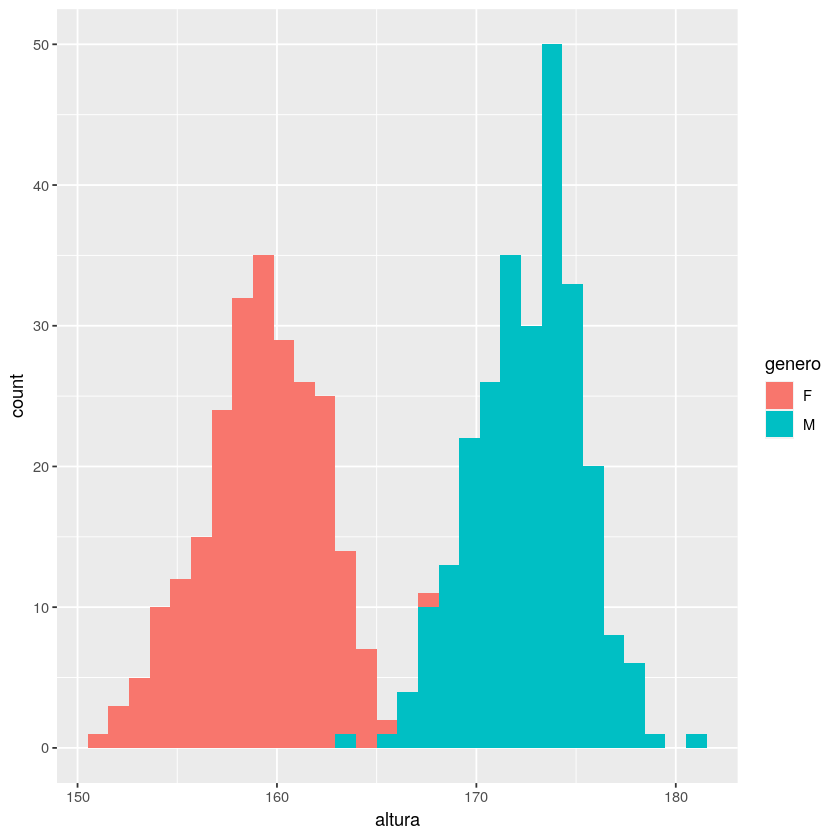

In [4]:
# 4. Histograma
library(ggplot2)
ggplot(data, aes(x=altura, fill=genero)) + geom_histogram()

> Se observan **dos modas**, correspondientes al género de cada individuo.
>
> La causa más probable es la **genética** de los individuos, con una mayor tendencia del género masculino a desarrollar una mayor altura que el género femenino.
>
> **Observación:** Existen otras causas que influyan en la altura, como la [ingesta protéica de los individuos](https://en.wikipedia.org/wiki/Human_height#Process_of_growth), pero consideramos en este caso que la muestra es aleatoria, proveniente de una area geográfica con características similares, y este tipo de influencias, despreciables en cuanto al motivo de las modas (aunque pueden influir en su dispersión).

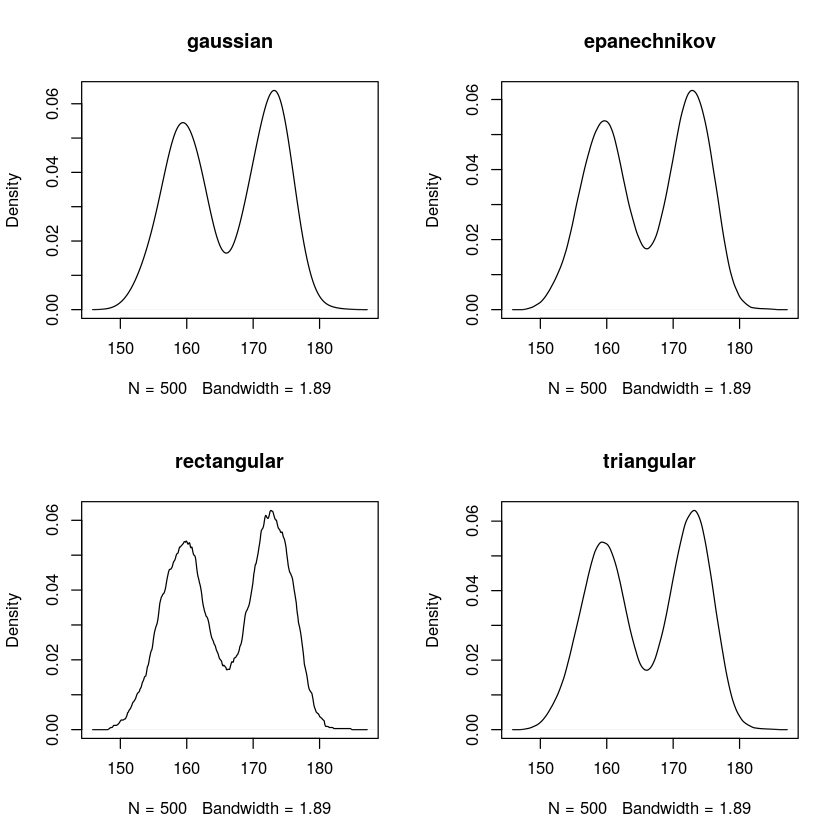

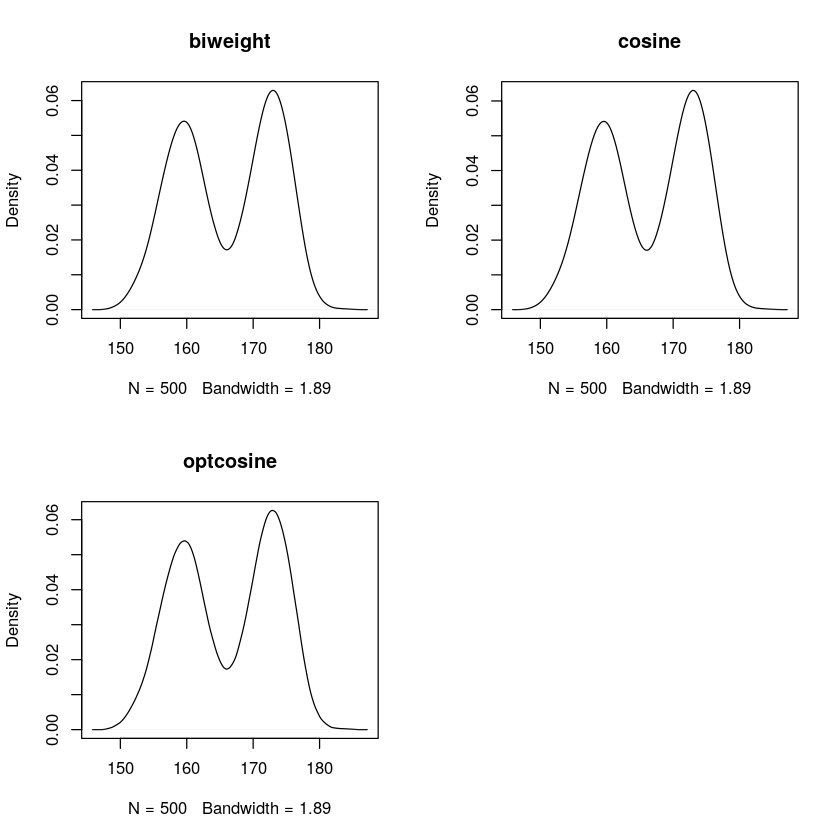

In [5]:
# 5. Density
kernel = c("gaussian", "epanechnikov", "rectangular",
                        "triangular", "biweight",
                        "cosine", "optcosine")
#plot(density(data$altura))
attach(data)
par(mfrow=c(2,2))
for(k in kernel){
    plot(density(altura, kernel=k), main=k)
}







# 2. Vamos ahora a considerar la altura de la mamá.

10. Graficar altura de mamá (en el eje x) vs. altura del hije (eje y), utilizando un color por
    cada género. ¿Qué se puede observar?

    En adelante, trabajaremos apenas con los datos de los hijos (género masculino).


11. Indicar si hay alguna madre de hijo varón cuya altura sea 156 cm.


12. Vamos ahora a predicir la altura de un hijo correspondiente a una mamá que mide
    x=156 cm haciendo promedio móvil centrado en 156 con ventana de tamaño h=0.5
    (cm).

    a) Indicar cúantos casos hay donde la madre registra una altura entre 155.5 y 156.5 cm., inclusive.
    
    b) Calcular el promedio de la altura de los hijos cuyas madres registran una altura entre 155.5 y 156.5 cm.


13. Promedio móvil centrado en 156 con ventana de tamaño h=1 (cm).

    a) Indicar cúantos casos hay donde la madre registre una altura entre 155 y 157 cm., inclusive.
    
    b) Calcular el promedio de la altura de los hijos cuyas madres registran una altura entre 155 y 157 cm.


14. Repetir los items anteriores pero considerando ahora que la altura de la mamá es 159
    cm. Es decir, nos movemos a calcular promedios en otro lado. Por eso hablamos de
    promedios móviles.


In [6]:
data.M <- data[data$genero == 'M',]
head(data.M)

,altura,genero,contextura_madre,altura_madre
1,169.9,M,mediana,160.5
4,172.8,M,mediana,161.7
6,169.7,M,mediana,162.0
8,172.0,M,bajita,153.8
10,171.2,M,bajita,154.7
11,174.5,M,alta,162.6


In [7]:
# 12.a) Numero de Madres en ventana
nrow(data.M[data.M$altura_madre > 155.5 & data.M$altura_madre < 156.5,])

[1] 10

# 3. Implementando funciones

Hasta ahora hemos trabajado con dos posibles valores para la altura de la madre (156
y 159) y dos posibles valores de ventana (h=0.5 y h= 1).

Vamos ahora a implementar una función que permita predecir la altura de un hijo en función de la altura de la
madre y el tamaño h de ventana elegida para hacer el promedio móvil.

15. Implemente una función que permita predecir la altura de un hijo en función de la
    altura de la madre, los datos para la altura de los individuos y de las madres y el
    tamaño h de ventana elegida para hacer el promedio móvil. Es decir, defina la función
    predigo_altura_masculino(altura, altura_madre, altura_mama_nueva, h)
    
16. Graficar la función predigo_altura_masculino, con $h=0.5$, evaluandola a lo largo de
    una una grilla sobre un intervalo que cubra todas las alturas observadas en las madres.

17. Repita el item anterior usandoh= 1. Repita usandoh= 5. Grafique las tres funciones
    en un mismo gráfico utilizando un color diferente para cada valor deh.
    Hasta el momento hemos trabajado utilizando siempre un mismo conjunto de datos.
    Vamos ahora a implementar nuevas funciones que incluyan entre sus argumentos a los
    datos. Es decir,
    
18. Implemente una función que tenga por input un conjunto de valores de X, sus corres-
    pondientes valores de Y, un nuevo valor x donde queremos predecir, y el tamaño h de la
    ventana que vamos a utilizar a la hora de hacer promedios moviles.predigoVentana(X,
    Y, xNuevo, h)
    
19. Pensar en alguna situación relacionada a su campo de trabajo donde pueda ser im-
    portante predecir cierta variable respuesta con una (o varias) variables explicativas.
    Contanos el problema, el marco teórico y avisanos si tenés datos que puedas compar-
    tir. Asi vemos que dá!


a) Ejercicio 16 de la Guía TP 7 resuelto  para valores de h=0.5, 1 y 5

b) script del Ejercicio 18

c) en a lo sumo 8 líneas descripción de alguna situación relacionada a su campo de trabajo donde pueda ser importante predecir cierta variable respuesta con una (o varias) variables explicativas, contando el problema y el marco teórico.


In [8]:
predigo_altura_masculino <- function(altura, altura_madre, 
                                     altura_mama_nueva, h){
    min_altura <- altura_mama_nueva - h
    max_altura <- altura_mama_nueva + h
    relevantes <- altura[altura_madre > min_altura & altura_madre < max_altura]
    pred <- mean(relevantes)
    return(pred)
}

In [9]:
predigo_altura_masculino(data$altura, data$altura_madre, 10, 0.1)

[1] NaN

In [10]:
# 16. Grilla de ventanas. 
# Uso de extremos max/min altura_madre.
# Notar que el promedio en los extremos será sesgado hacia "el centro"
hs <- c(0.5, 1.0, 5.0)
min_altura <- min(data$altura_madre)
max_altura <- max(data$altura_madre)
grilla <- seq(min_altura, max_altura, by=0.1)

m <- length(grilla)
preds <- data.frame(h05=rep(0,m),
                    h1=rep(0,m),
                    h5=rep(0,m))
for(i in 1:m){
    altura_mama <- grilla[i]
    for(j in 1:length(hs)){
        h <- hs[j]
        preds[i, j] <- predigo_altura_masculino(data$altura, data$altura_madre, altura_mama, h)
    }
}

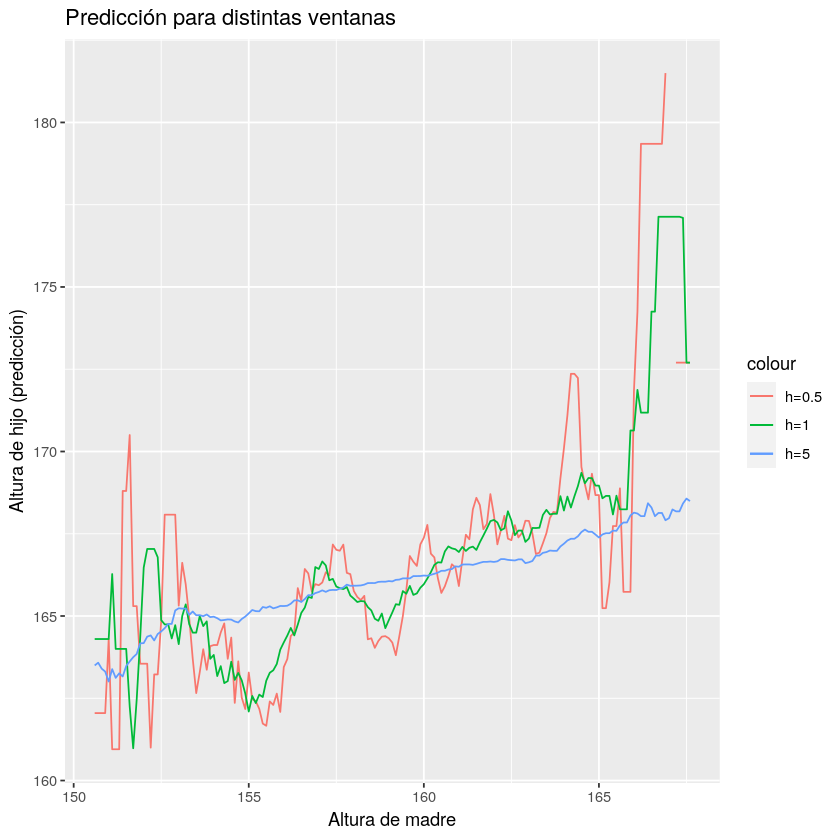

In [11]:
library(ggplot2)
ggplot(preds, aes(x="asd")) + 
    geom_line(aes(x=grilla, y=h05, col="h=0.5")) +
    geom_line(aes(x=grilla, y=h1, col="h=1")) +
    geom_line(aes(x=grilla, y=h5, col="h=5")) +
    ggtitle("Predicción para distintas ventanas") +
    labs(x = "Altura de madre", y="Altura de hijo (predicción)")

In [12]:
# 18.
predigoVentana <- function(X, Y, xNuevo, h){
    
    min_x <- xNuevo - h
    max_x <- xNuevo + h
    relevantes <- altura[X > min_x & X < max_x]
    pred <- mean(relevantes)
    return(pred)
}


Mi campo de trabajo actual es el uso de Aprendizaje por Refuerzo (RL) para la predicción en toma de decisiones.

No puedo comentar los detalles por un tema de confidencialidad con la empresa, pero puedo describir el problema general $[*]$.

$[*]$ **Observación:** Tal vez lo que escriba sea como buscar morderse la cola con el objetivo del ejercicio, pues RL se trata justamente de predecir variables a partir de observaciones (aunque con sus particularidades). Si creen que este es el caso, puedo reescribirlo con alguna otra aplicación tipo hobbie o idea)*.

El problema a resolver es el siguiente:

Existe una **interacción** entre un **algoritmo (*agente*)** y un **entorno (*environment*)**.

El agente **observa estados (*states*) del entorno** en que se encuentra, y a partir de ellos, debe **decidir qué decisión (*acción*) tomar**, y al hacerlo, recibe una **recompensa (*reward*)**.

La diferencia con el problema resuelto en los ejercicios anteriores, es que **los datos se reciben uno a uno, a medida que el agente interactúa con el *environment* en que se encuentra, toma nuevas decisiones, y recibe nuevos datos** (que **dependen** de sus acciones en esos estados particulares).

De esta forma, el "aprendizaje" se da de manera contínua a medida que se reciben nuevos datos.

La dificultad del problema es que tomar **malas decisiones**, resulta en **datos malos**, de los cuales **no** es posible aprender **buenas estrategias**, y por lo tanto, **el aprendizaje es nulo, inútil o muy lento**.

Para eso se introducen valores que **califican** cada estado y cada acción, de forma que los *estados-acción* con puntajes altos sean preferibles frente a otros con bajos puntajes.

También se introduce el concepto de ***exploración***, en el cual con una baja probabilidad, la acción a tomar es aleatoria, promoviendo la exploración del espacio de estados total (y no solo repetir buenas acciones e ignorar las malas, previamente tomadas).

Todo esto se construye sobre la base teórica de las [ecuaciones de Bellman](https://en.wikipedia.org/wiki/Bellman_equation), en combinación con regresión lineal, y más recientemente con redes neuronales y aprendizaje profundo.


### Más concreto

Una aplicación más concreta de predecir variables a partir de features para este problema, es la búsqueda de mejores hiperparámetros en cada caso particular, mediante el uso de gridsearch y búsqueda aleatoria, o con modelos más sofisticados como árboles de decisión, procesos gaussianos, etc.

En este caso las variables a predecir serán cada uno de los hiperparámetros, y las variables observadas a partir de las cuales predecir, algún puntaje promedio para una N cantidad de episodios simulados.

# 4. Por si fuera poco

20. Calcular ahora predicciones para la altura del hijo conociendo la altura de la madre
    haciendo promedio de vecinos cercanos. Para ello, implementar una función que tenga
    por input un conjunto de valores deX, sus correpondientes valores deY, un nuevo valor
    xdonde queremos predecir, y la cantidadkde vecinos que vamos a utilizar a la hora
    de hacer promedios.predigoVecinos(X, Y, xNuevo, k)

In [13]:
head(data.M)

,altura,genero,contextura_madre,altura_madre
1,169.9,M,mediana,160.5
4,172.8,M,mediana,161.7
6,169.7,M,mediana,162.0
8,172.0,M,bajita,153.8
10,171.2,M,bajita,154.7
11,174.5,M,alta,162.6


In [28]:
pivote <- 165
which.minimums(abs(data.M[order(data.M$altura_madre), 'altura_madre'] - pivote))

ERROR: Error in which.minimums(abs(data.M[order(data.M$altura_madre), "altura_madre"] - : could not find function "which.minimums"


In [43]:
k <- 5
cercanos <- data.M[order(abs(data.M$altura_madre - pivote)), ]

In [44]:
k <- 5
cercanos <- data.M[order(abs(data.M$altura_madre - pivote)), ]
k.cercanos <- cercanos[1:k, ]pero man
k.cercanos

,altura,genero,contextura_madre,altura_madre
380,172.8,M,alta,164.9
450,172.8,M,alta,165.2
453,174.4,M,alta,165.2
133,174.0,M,alta,164.6
254,173.9,M,alta,164.6
366,175.1,M,alta,164.6
467,176.0,M,alta,164.6
114,176.7,M,alta,165.7
486,177.1,M,alta,164.3
172,174.5,M,alta,164.2
